# Chapter 19: Complex Reaction Mechanism 

## Ex19.1:pg-511

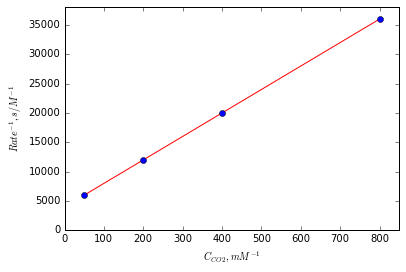

Km and k2 are 10.0 mM and 1.1e+05 s-1


In [16]:
import numpy as np
from numpy import arange,array,ones,linalg,size
from matplotlib.pylab import plot,show,xlim,ylim,xlabel,ylabel
%matplotlib inline
import math

#Variable declaration
Ce = 2.3e-9        #Initial value of enzyme concentration, M
r = array([2.78e-5,5.e-5,8.33e-5,1.67e-4])
CCO2 = array([1.25e-3,2.5e-3,5.e-3,20.e-3])

#Calculations
rinv = 1./r
CCO2inv = 1./CCO2
xlim(0,850)
ylim(0,38000)
xi = CCO2inv
A = array([ CCO2inv, ones(size(CCO2inv))])
# linearly generated sequence
w = linalg.lstsq(A.T,rinv)[0] # obtaining the parameters
slope = w[0]
intercept = w[1]

line = w[0]*CCO2inv+w[1] # regression line
plot(CCO2inv,line,'r-',CCO2inv,rinv,'o')
xlabel('$ {C_{CO}}_2, mM^{-1} $')
ylabel('$ Rate^{-1}, s/M^{-1} $')
show()
rmax = 1./intercept
k2 = rmax/Ce
Km = slope*rmax

#Results
print 'Km and k2 are %4.1f mM and %3.1e s-1'%(Km*1e3,k2)

## Ex19.2:pg-517

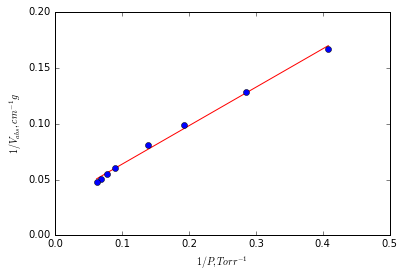

Slope and intercept are 0.3449 torr.g/cm3 and 0.0293 g/cm3
K and Vm are 8.48e-02 Torr^-1 and 34.2 cm3/g


In [17]:
from numpy import arange,array,ones,linalg
from matplotlib.pylab import plot,show,xlim,ylim,xlabel,ylabel
%matplotlib inline
import math

#Variable declaration
Vads = array([5.98,7.76,10.1,12.35,16.45,18.05,19.72,21.1])   #Adsorption data at 193.5K
P = array([2.45,3.5,5.2,7.2,11.2,12.8,14.6,16.1])             #Pressure, torr

#Calculations
Vinv = 1./Vads
Pinv =1./P
xlim(0,0.5)
ylim(0,0.2)
A = array([ Pinv, ones(size(Pinv))])
# linearly generated sequence
w = linalg.lstsq(A.T,Vinv)[0] # obtaining the parameters
m = w[0]
c = w[1]
line = m*Pinv+c # regression line
plot(Pinv,line,'r-',Pinv,Vinv,'o')
xlabel('$ 1/P, Torr^{-1} $')
ylabel('$ 1/V_{abs}, cm^{-1}g $')
show()
Vm = 1./c
K = 1./(m*Vm)

#Results
print 'Slope and intercept are %5.4f torr.g/cm3 and %5.4f g/cm3'%(m,c)
print 'K and Vm are %4.2e Torr^-1 and %3.1f cm3/g'%(K,Vm)

## Ex19.4:pg-533

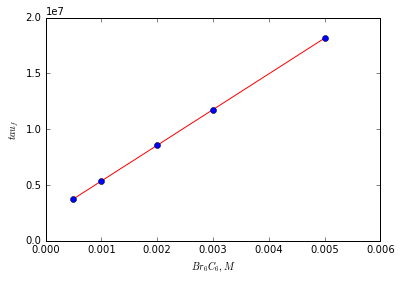

Slope and intercept are kq = 3.1995e+09 per s and kf = 2.1545e+06 per s


In [13]:
from numpy import arange,array,ones,linalg
from matplotlib.pylab import plot,show,xlim,ylim,xlabel,ylabel
%matplotlib inline
import math

#Variable declaration
CBr = array([0.0005,0.001,0.002,0.003,0.005])                    #C6Br6 concentration, M
tf = array([2.66e-7,1.87e-7,1.17e-7,8.50e-8,5.51e-8])            #Fluroscence life time, s

#Calculations
Tfinv = 1./tf
xlim(0,0.006)
ylim(0,2.e7)
A = array([ CBr, ones(size(CBr))])
# linearly generated sequence
[m,c] = linalg.lstsq(A.T,Tfinv)[0] # obtaining the parameters

line = m*CBr+c # regression line
plot(CBr,line,'r-',CBr,Tfinv,'o')
xlabel('$ Br_6C_6, M $')
ylabel('$ tau_f $')
show()

#Results
print 'Slope and intercept are kq = %5.4e per s and kf = %5.4e per s'%(m,c)

## Ex19.5:pg-536

In [12]:
from scipy.optimize import root
import math

#Variable Declaration
r = 11.          #Distance of residue separation, °A
r0 = 9.          #Initial Distance of residue separation, °A
EffD = 0.2      #Fraction decrease in eff

#Calculations
Effi = r0**6/(r0**6+r**6)
Eff = Effi*(1-EffD)
f = lambda r: r0**6/(r0**6+r**6) - Eff
sol = root(f, 12)
rn = sol.x[0]

#Results
print 'Separation Distance at decreased efficiency %4.2f'%rn

Separation Distance at decreased efficiency 11.53


## Ex19.6:pg-538

In [14]:
#Variable Declarations
import math
mr = 2.5e-3        #Moles reacted, mol
P = 100.0          #Irradiation Power, J/s
t = 27             #Time of irradiation, s
h = 6.626e-34      #Planks constant, Js
c = 3.0e8          #Speed of light, m/s
labda = 280e-9     #Wavelength of light, m

#Calculation
Eabs = P*t
Eph = h*c/labda
nph = Eabs/Eph     #moles of photone
phi = mr/6.31e-3

#Results
print 'Total photon energy absorbed by sample %3.1e J'%Eabs
print 'Photon energy absorbed at 280 nm is %3.1e J'%Eph
print 'Total number of photon absorbed by sample %3.1e photones'%nph
print 'Overall quantum yield %4.2f'%phi

Total photon energy absorbed by sample 2.7e+03 J
Photon energy absorbed at 280 nm is 7.1e-19 J
Total number of photon absorbed by sample 3.8e+21 photones
Overall quantum yield 0.40


## Ex19.7:pg-542

In [15]:
from math import exp
#Variable Declarations
r = 2.0e9          #Rate constant for electron transfer, per s
labda = 1.2        #Gibss energy change, eV
DG = -1.93         #Gibss energy change for 2-naphthoquinoyl, eV
k = 1.38e-23       #Boltzman constant, J/K
T = 298.0          #Temeprature, K
#Calculation
DGS = (DG+labda)**2/(4*labda)
k193 = r*exp(-DGS*1.6e-19/(k*T))
#Results
print 'DGS = %5.3f eV'%DGS
print 'Rate constant with barrier to electron transfer %3.2e per s'%k193

DGS = 0.111 eV
Rate constant with barrier to electron transfer 2.66e+07 per s
